Oh hey. Welcome to the first homework. 

# Jupyter Notebooks
Any time we do coding, we will be using Jupyter notebooks. Jupyter notebooks consist of *cells* which can be either markdown (for text) or code. You can execute the code by running the cells. (Either by pressing one of the run buttons or using `ctrl+enter`.

A Jupyter notebook runs a python interpreter within the browser. This means the following things that will become more clear as you use it:
- Commands are run in the order you run them.
- Variables, functions, and other objects are loaded into memory in the order they are defined.
- If you shutdown the notebook, all of the variables, functions, and other objects are removed from memory.
- If you restart the notebook, you will need to run the code cells again to redefine the variables, functions, and other objects.

(This often causes confusion for new users, as they try to pick up where they left off from a previous day, and they start getting errors because none of the variables are loaded into memory.)



In [3]:
# This code cell imports the basic scientific programming Libraries that we will use
# The later code will not work unless your run this one first.
import numpy as np
import scipy.linalg as la
import scipy.integrate as itg
import matplotlib.pyplot as plt

%matplotlib inline

Here we will implement some basic Newton's equations 

\begin{equation*}
\dot x(t) = \begin{bmatrix} 0 & 1 \\
0 & 0 \end{bmatrix} x(t) + \begin{bmatrix}0 \\ 1 \end{bmatrix}u(t)
\end{equation*}
where we have set $m=1$ for simplicity. 

We will show what happens when the system is run with an open-loop input as shown below:

Text(0.5, 1.0, 'Input Trajectory')

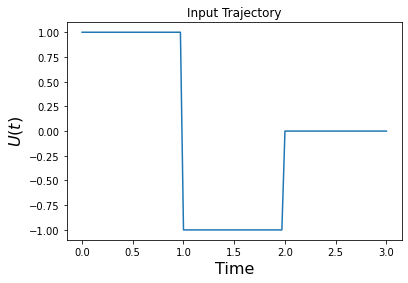

In [8]:
def simpleInputFunction(t):
    if t < 1:
        u = np.array([1.])
    elif t < 2:
        u = np.array([-1.])
    else:
        u = np.array([0.])
    return u

Time = np.linspace(0,3,100)
U = np.array([simpleInputFunction(t) for t in Time])
plt.plot(Time,U)
plt.xlabel('Time',fontsize=16)
plt.ylabel(r'$U(t)$',fontsize=16)
plt.title('Input Trajectory')

The simulation will use `odeint` from the `scipy.integrate` package. This function simulates ordinary differential equations of the form:
\begin{equation*}
\dot x(t) = f(x(t),t)
\end{equation*}

Text(0.5, 0, 'Time')

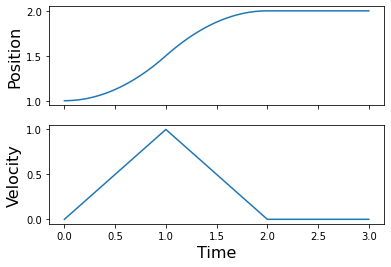

In [19]:
# Here is the simulation

A = np.array([[0.,1.],
              [0.,0.]])
B = np.array([[0.],
              [1.]])

def openLoopNewton(x,t):
    
    u = simpleInputFunction(t)
    x_dot = A@x + B@u
    return x_dot

x0 = np.array([1.,
               0])
X = itg.odeint(openLoopNewton,x0,Time)
fix,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(Time,X[:,0])
ax[1].plot(Time,X[:,1])
ax[0].set_ylabel('Position',fontsize=16)
ax[1].set_ylabel('Velocity',fontsize=16)
ax[1].set_xlabel('Time',fontsize=16)

As we saw from class, the optimal solution to minimize 
\begin{equation*}
\int_0^{T_f} \left(x(t)^\top Q x(t) +u(t)^\top R u(t) \right)dt + x(T_f)^\top S_{T_f}^{T_f} x(T_f)
\end{equation*}
is given by the linear feedback gain: $u(t) = -R^{-1}B^\top S_t^{T_f}x(t)$, where $S_t^{T_f}$ is given by the Riccati differential equation:
\begin{equation*}
-\frac{d}{dt}S^{T_f}_t = Q + A^\top S_t^{T_f}+S^{T_f}_t A - S_t^{T_f} BR^{-1}B^\top S_t^{T_f}.
\end{equation*}

The Riccati differential equation is known as a *final-value problem*, since the final value $S_{T_f}^{T_f}$ is given and the differential equation is used to compute past values $S_t^{T_f}$, for $t< T_f$. 

# Theory Question

Most differential equation solvers, such as `odeint` solve *initial value problems*. That is, the value at time $0$ is known, (e.g. $x(0)$ is known) and solutions at future times are computed ($x(t)$ for $t>0$.)

Describe how you could compute the values of $S_t^{T_f}$ by solving a corresponding initial value problem. 

Either write the solution here, or attach a hand-written file describing the solution.

# Coding Question

Assume that $Q$, $R$, and $S_{T_f}^{T_f}$ are given by

In [37]:
Q = np.diag([1.,0.])
R = np.array([[1.]])
S_final = np.zeros((2,2))

Use `odeint` to find $S_t^{T_f}$ at the time points given by:

In [34]:
Time = np.linspace(0,10,200)

Plot the values ot $S_t^{T_f}$ over these times.

Hints:
- Use the ideas from above to cast the computation as an initial-value problem
- While $S_t^{T_f}$ is a $2\times 2$ matrix, symmetry  implies that there are only $3$ distinct values. 
- `odeint` assumes that the state is a vector (i.e. a 1D array), not a matrix (i.e. a 2D array). 
- See https://numpy.org/devdocs/user/absolute_beginners.html for discussion on the distinction between vectors and matrices in `numpy`.
- Based on this discussion, the state should be a vector of length $3$.

In [39]:
# Put your code here

Text(0.5, 0, 'Time')

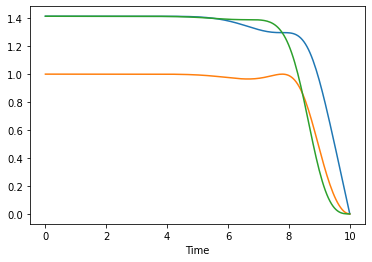

In [42]:
# Solution
G = B @ la.inv(R) @ B.T
def riccati(S_flat,t):
    a,b,c = S_flat
    S = np.array([[a,b],
                  [b,c]])
    S_dot = Q + A.T @ S + S@ A - S@G @ S.T
    a_dot,b_dot = S_dot[0]
    c_dot = S_dot[1,1]
    S_flat_dot = np.array([a_dot,b_dot,c_dot])
    
    return S_flat_dot
    
    
    
Time = np.linspace(0,10,200)
S_flat_0 = np.array([S_final[0,0],S_final[0,1],S_final[1,1]])
S_flat_array = itg.odeint(riccati,S_flat_0,Time)
plt.plot(Time,S_flat_array[::-1])
plt.xlabel('Time')

# Coding Question

Compute the solution, $S$, to the associated *algebraic Riccati equation*:
$$
0 = Q + A^\top S + SA -SBR^{-1}B^\top S
$$

You can do this analytically, or use the command `la.solve_continuous_are`. 

Redo your plot of $S_t^{T_f}$, overlaying the values of $S$ from this problem to demonstrate how these correspond to asymptotic values of $S_t^{T_f}$.

In [ ]:
# Put your code here

Text(0.5, 0, 'Time')

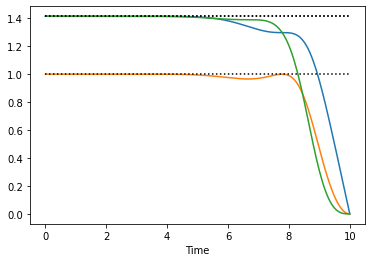

In [45]:
# Solution
S = la.solve_continuous_are(A,B,Q,R)
S_flat_0 = np.array([S[0,0],S[0,1],S[1,1]])
plt.plot(Time,S_flat_array[::-1])
for s in S_flat_0:
    plt.plot([Time[0],Time[-1]],[s,s],'k:')
plt.xlabel('Time')